# CNN versus Cats and Dogs

In this notebook we will train a Convolutional Neural Networks to distinguish between cats and dogs. We will use a small version of the **Cats and Dogs Dataset** that can be found here: https://www.kaggle.com/c/dogs-vs-cats/data. By the way, this example is taken from [1].

In [5]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/TC3007C/CNN/Cats and Dogs"
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TC3007C/CNN/Cats and Dogs
/content/drive/MyDrive/TC3007C/CNN/Cats and Dogs


Well, yes, I downloaded the data and uploaded it in my Google Drive as you can see. In any case, let us load some important libraries and modules.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

So we are loading `tensorflow`, as usual, along with the `keras` library: `tensorflow` is a machine learning library, whereas `keras` is a **deep learning** library that works on top of `tensorflow`. 

Probably you noticed that we are working with some familiar libraries and modules, but some of these are new: the `os` library and `ImageDataGenerator` module. The `os` library provides functions for interacting with the operating system, some of those being useful for using the file system. The `ImageDataGenerator` module is useful tool for handling the data for training and evaluating a, say, CNN when we are working with images. 

In [7]:
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size = (150, 150),
																										batch_size = 20,
																										class_mode ='binary')

validation_generator = validation_datagen.flow_from_directory(
																										validation_dir,
                                                    target_size = (150,150),
																										batch_size =20,
																										class_mode= 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Notice that we instantiate `ImageDataGenerator` twice. Each instance will point to a path defined by its corresponding variable: `train_generator`, through the `flow_from_directory` method, will point to the path stored in `train_dir`. Even more, each instance will rescale the images by a factor of 1/255 so that their values range from zero to one. Not only that, via the `flow_from_directory` method, we can fix the size of each image of both the training and validation sets, specify the size of each batch, and define the type of classification we are going to implementt. In this case we will "teach" a CNN how to classify cats and dogs, so it is a binary classification problem. 

It is important to point out that the subdirectories of the directory each instance is pointing to will help the `ImageDataGenerator` tool to infer the number of classes of the classification task.

Now we are ready to build our model. As expected, we will implement a CNN, however, since our data is more complex than the MNIST data, we will have to scale things up with the CNN: that is, we need more complex architecture. Here it goes.

In [8]:
model = models.Sequential([
                          Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
                          MaxPooling2D((2, 2)),
                          Conv2D(64, (3, 3), activation='relu'), 
                          MaxPooling2D((2, 2)),
                          Conv2D(128, (3, 3), activation='relu'), 
                          MaxPooling2D((2, 2)), 
                          Conv2D(128, (3, 3), activation='relu'), 
                          MaxPooling2D((2, 2)), 
                          Flatten(), 
                          Dense(512, activation='relu'), 
                          Dense(1, activation='sigmoid')
                          ])

At this point you might be wondering, how many parameters will this CNN have? We can find that out with the `summary` method.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Almost three and a half million parameters! Now we are talking.

As you probably know by now, once the model is defined, it needs to be compiled. In this case, the cost function will be the `binary_crossentropy` loss, the gradient descend method is RMSprop, and the evaluation metric is `accuracy`.

In [10]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

By the way, we will be using the validation data to see how our model performs, so apart from the `steps_per_epoch` and the number of `epochs` we have to tell the `fit` method where the validation data comes from, plus the number of `validation_steps`. And now we train. 

In [11]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 355s 4s/step - loss: 0.6853 - acc: 0.5530 - val_loss: 0.6656 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 108s 1s/step - loss: 0.6448 - acc: 0.6125 - val_loss: 0.6276 - val_acc: 0.6390
Epoch 3/30
100/100 [==============================] - 109s 1s/step - loss: 0.5907 - acc: 0.6900 - val_loss: 0.6371 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.5671 - acc: 0.7090 - val_loss: 0.5961 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 108s 1s/step - loss: 0.5345 - acc: 0.7320 - val_loss: 0.5891 - val_acc: 0.6730
Epoch 6/30
100/100 [==============================] - 109s 1s/step - loss: 0.5132 - acc: 0.7460 - val_loss: 0.5925 - val_acc: 0.6650
Epoch 7/30
100/100 [==============================] - 109s 1s/step - loss: 0.4944 - acc: 0.7570 - val_loss: 0.6220 - val_acc: 0.6620
Epoch 8/30
100/100 [==============================] - 109s 1s/step - 

Bad news, we have overfitting. Bummer! Let us see how this overfitting looks with a couple of plots.

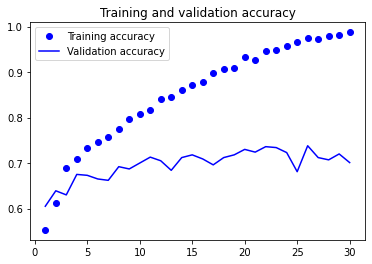

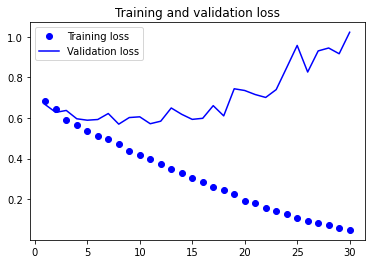

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Reference

[1] Chollet, Francois. *Deep learning with Python*. Simon and Schuster, 2021.